In [273]:
import seaborn as sea
import pandas as pd
from matplotlib import pyplot as plt

In [274]:
dados = pd.read_csv('bank-full.csv', sep = ';')

# ----------------------ANALISAR MISSING VALUES E LINHAS DUPLICADAS ----------------------------


In [275]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [276]:
#Ver missing values
dados.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [277]:
#Identificar se há null values no dataset
dados.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [278]:
#Identificar se há Nan values no dataset
dados.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [279]:
#Identificar possiveis valores duplicados no dataset
print(dados.duplicated().sum())

0


# ------------------------------------- ANALISAR O NOSSO TARGET --------------------------------------------


In [348]:
X = dados.drop('y',axis=1)
Y = dados['y']

In [351]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority',random_state=1)
x_dados , y_dados = rus.fit_resample(X,Y)


AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

In [ ]:
y_dados = y_dados.reset_index()
y_dados.drop('index', axis=1, inplace=True)

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sea.countplot(data=y_dados, x='y')
plt.title('Target Count')
plt.subplot(1,2,2)
labels = y_dados['y'].value_counts(sort=True).index
sizes = y_dados['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

In [280]:
dados.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

"""
PODEMOS REPARAR QUE O NOSSO DATASET É UNBALANCED VAMOS TER QUE O BALANCEAR
dados_temp = dados.copy()
dados2 = dados.copy()
dados2= dados2.sample(10000)
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sea.countplot(data=dados, x='y')
plt.title('Target Count')
plt.subplot(2,2,2)
labels = dados['y'].value_counts(sort=True).index
sizes = dados['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')
plt.subplot(2,2,3)
sea.countplot(data=dados2, x='y')
plt.title('Target Count do Dataset reduzido')
plt.subplot(2,2,4)
labels = dados2['y'].value_counts(sort=True).index
sizes = dados2['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No do Dataset reduzido')
"""

Text(0.5, 1.0, 'Target Yes and No')

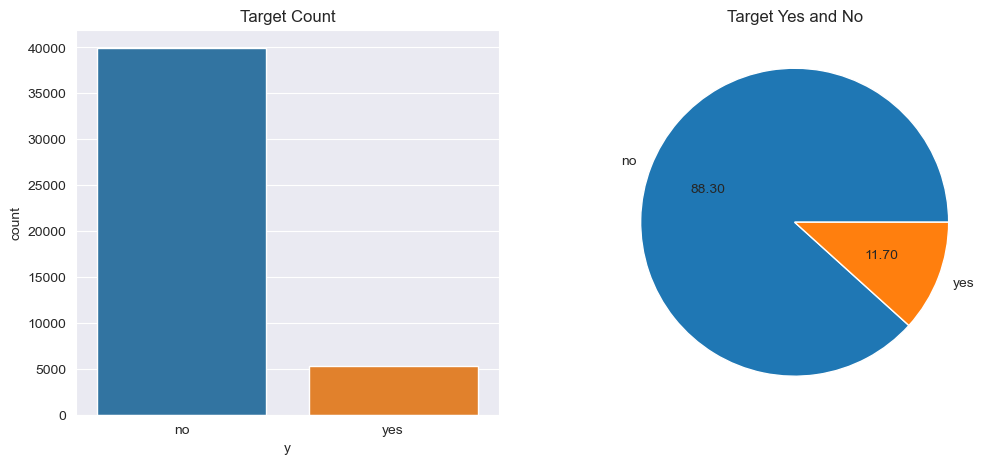

In [281]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='y')
plt.title('Target Count')
plt.subplot(1,2,2)
labels = dados['y'].value_counts(sort=True).index
sizes = dados['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

# --------------------------------------- ANALISAR OS DADOS CATEGORICOS --------------------------------

In [282]:
dados.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de Emprego')

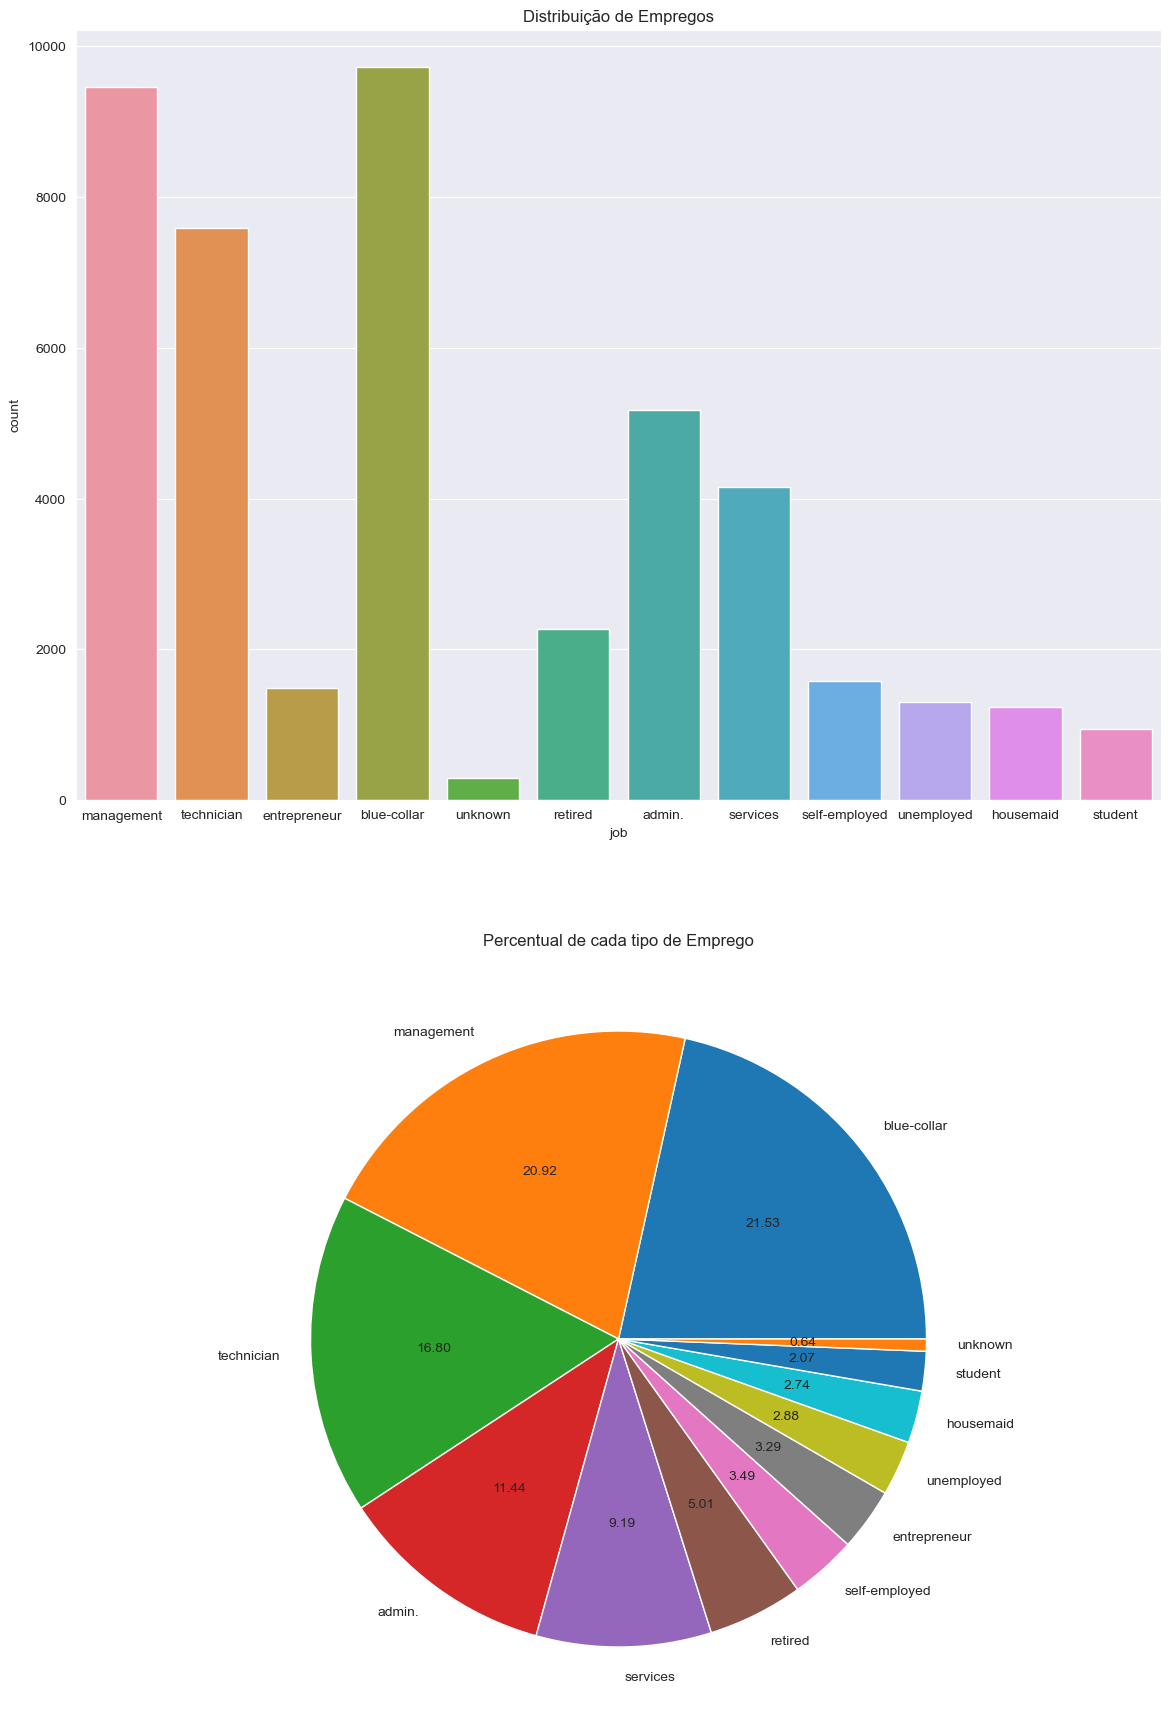

In [283]:
#Vizualizacao da distribuição de empregos plt pie e sea count plot
plt.figure(figsize = (14,22))
plt.subplot(2,1,1)
sea.countplot(data=dados, x='job')
plt.title('Distribuição de Empregos')
plt.subplot(2,1,2)
labels = dados['job'].value_counts(sort=True).index
sizes= dados['job'].value_counts(sort=True)
plt.pie(sizes,labels=labels, autopct='%.2f')
plt.title('Percentual de cada tipo de Emprego')

In [284]:
dados.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de estado civil')

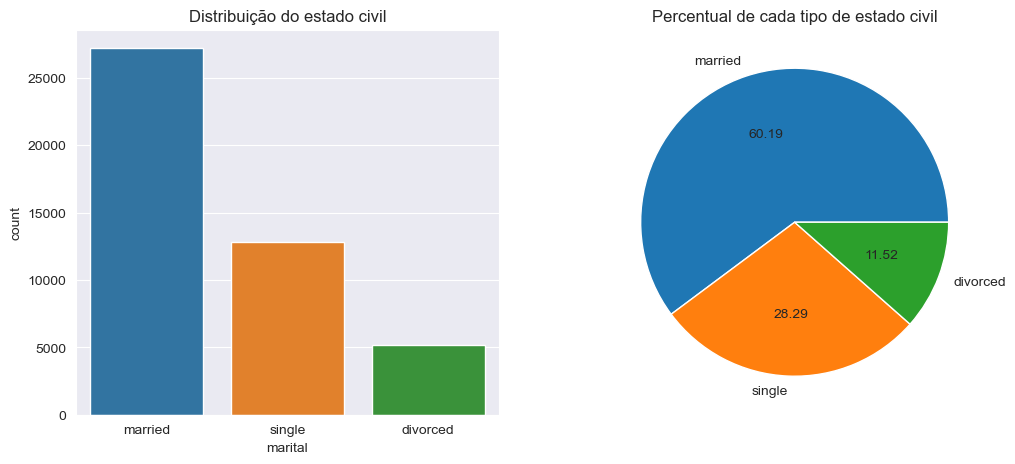

In [285]:
#Vizualizacao do estado civil plt pie e sea count plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='marital')
plt.title('Distribuição do estado civil')
plt.subplot(1,2,2)
labels=dados['marital'].value_counts(sort=True).index
sizes=dados['marital'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Percentual de cada tipo de estado civil')

In [286]:
dados.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de Educação')

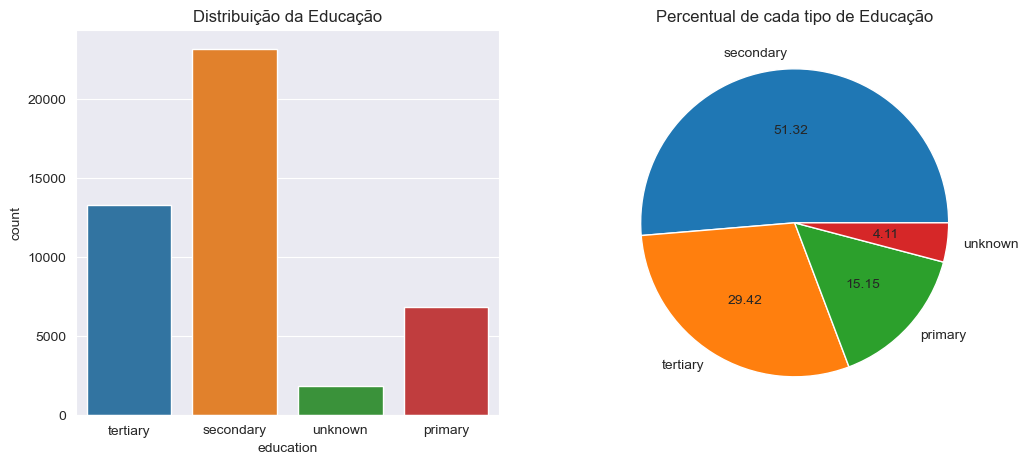

In [287]:
#Vizualizacao distribuicao da educação
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='education')
plt.title('Distribuição da Educação')
plt.subplot(1,2,2)
labels=dados['education'].value_counts(sort=True).index
sizes=dados['education'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Percentual de cada tipo de Educação')

In [288]:
dados.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

Text(0.5, 1.0, 'Credito a habitaçao')

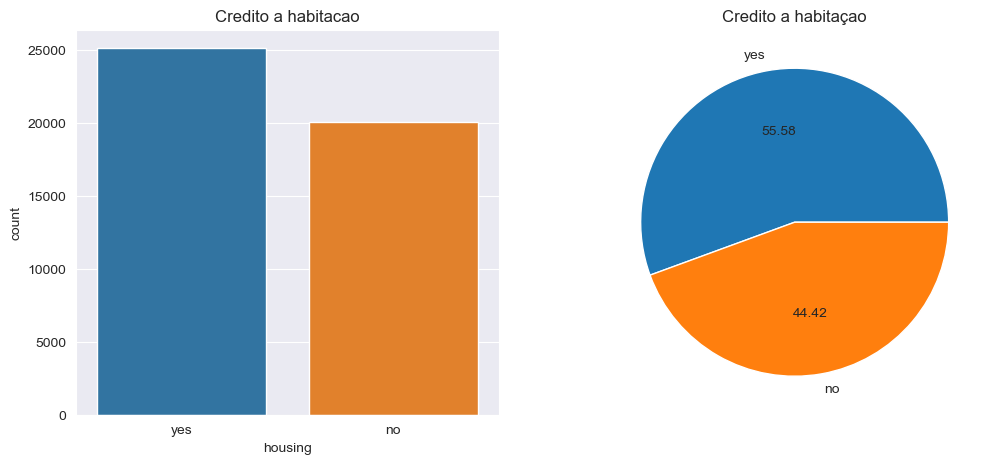

In [289]:
#Vizualizacao house loan plt pie
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='housing')
plt.title('Credito a habitacao')
plt.subplot(1,2,2)
labels=dados['housing'].value_counts(sort=True).index
sizes=dados['housing'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Credito a habitaçao')

In [290]:
dados.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Credito ao Consumo')

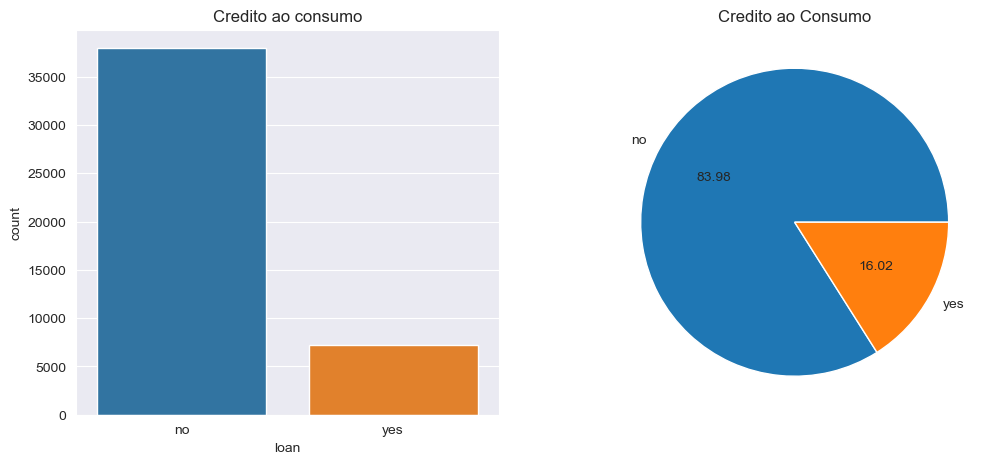

In [291]:
#Vizualizacao loan plt pie e seacount plt
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='loan')
plt.title('Credito ao consumo')
plt.subplot(1,2,2)
labels=dados['loan'].value_counts(sort=True).index
sizes=dados['loan'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Credito ao Consumo')

In [292]:
dados.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Tipo de contacto feito')

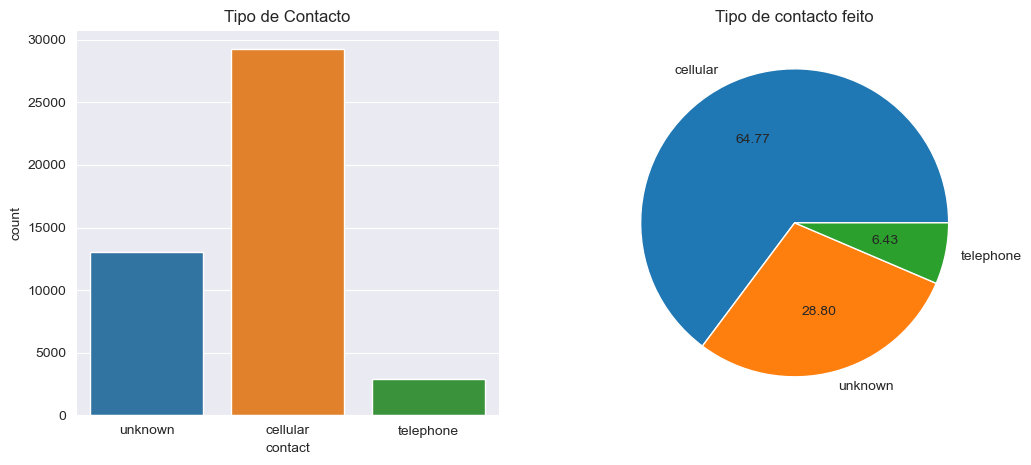

In [293]:
#Vizualizacao loan plt pie e seacount plt
##MUDAR AS CORES OU MUDAR A ORDEM DO X DO SEAPLT COUNT
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='contact')
plt.title('Tipo de Contacto')
plt.subplot(1,2,2)
labels=dados['contact'].value_counts(sort=True).index
sizes=dados['contact'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Tipo de contacto feito')

Text(0.5, 1.0, 'Sucesso da ultima campanha')

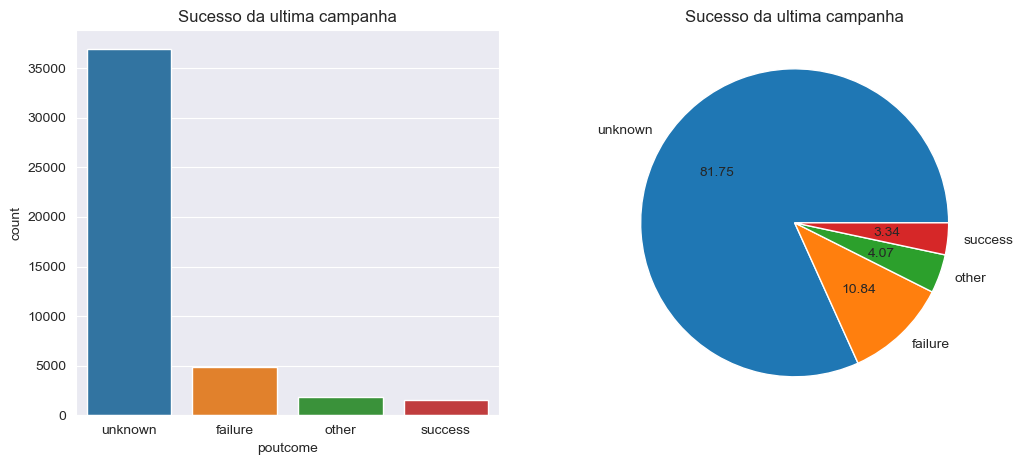

In [294]:
#Vizualizacao do sucesso da ultima campanha plt pie e seacount plt
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='poutcome')
plt.title('Sucesso da ultima campanha')
plt.subplot(1,2,2)
labels=dados['poutcome'].value_counts(sort=True).index
sizes=dados['poutcome'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Sucesso da ultima campanha')

Text(0.5, 1.0, 'Ultimo mes de contacto desta campanha')

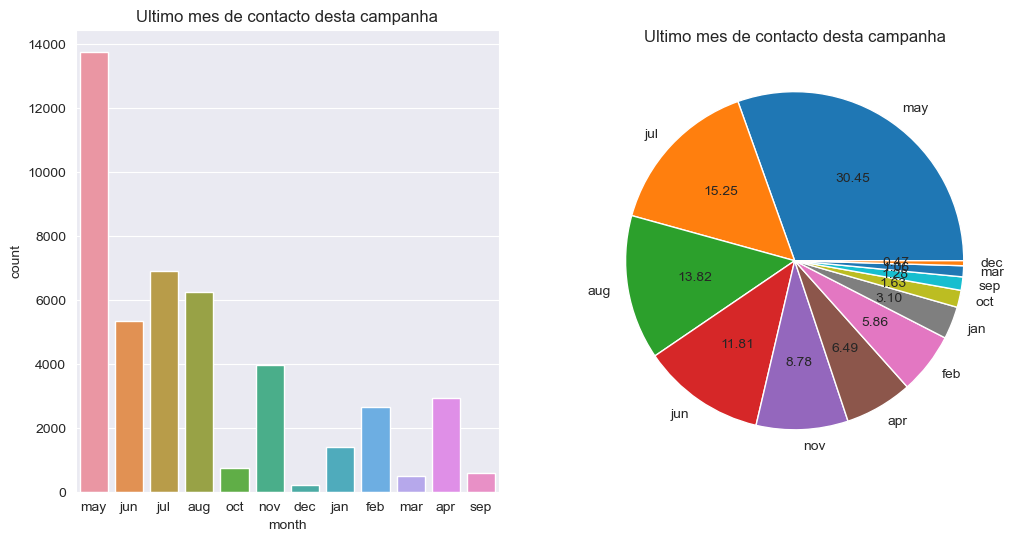

In [295]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
sea.countplot(data=dados, x='month')
plt.title('Ultimo mes de contacto desta campanha')
plt.subplot(1,2,2)
labels=dados['month'].value_counts(sort=True).index
sizes=dados['month'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Ultimo mes de contacto desta campanha')

# ------ ANALISAR OS NOSSOS DADOS CATEGORICOS COM O TARGET ----------

In [296]:
#Separar os dados Categoricos
dados_temp = dados.copy()
dados_cat = dados_temp.select_dtypes(include='object').columns.drop(["y","job"])

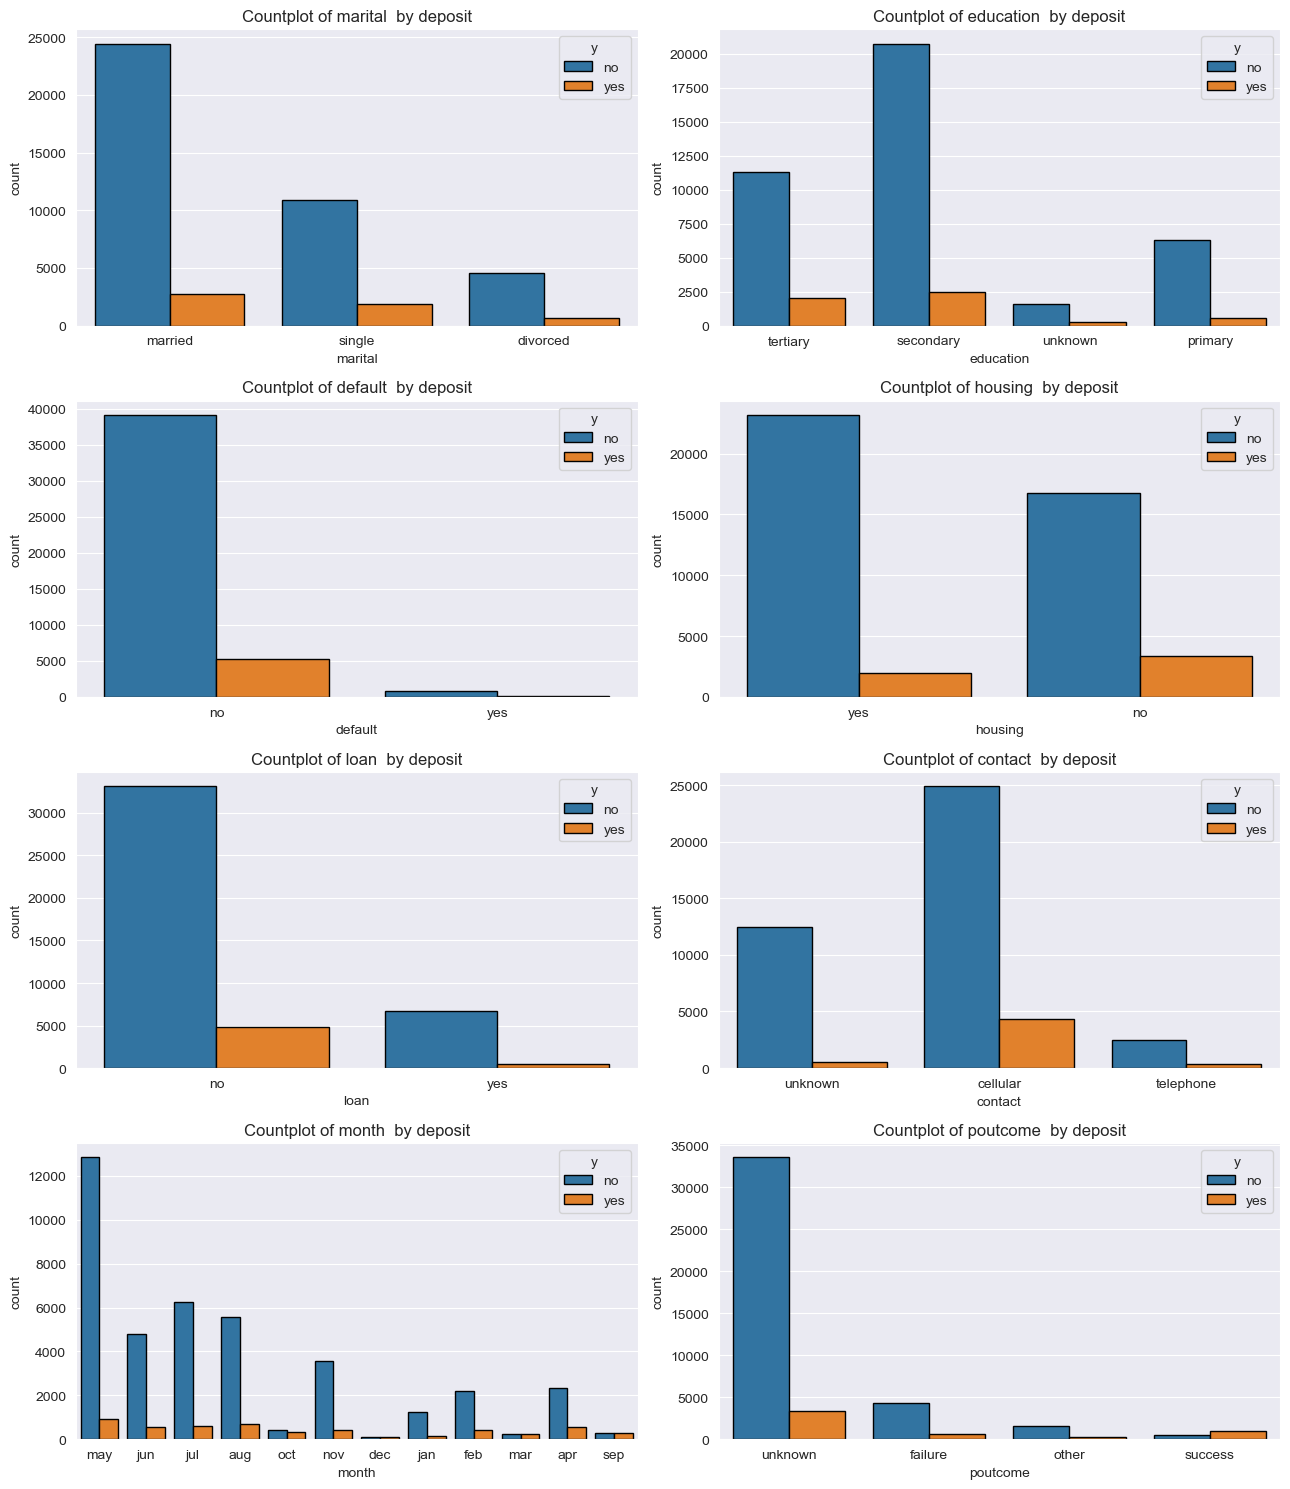

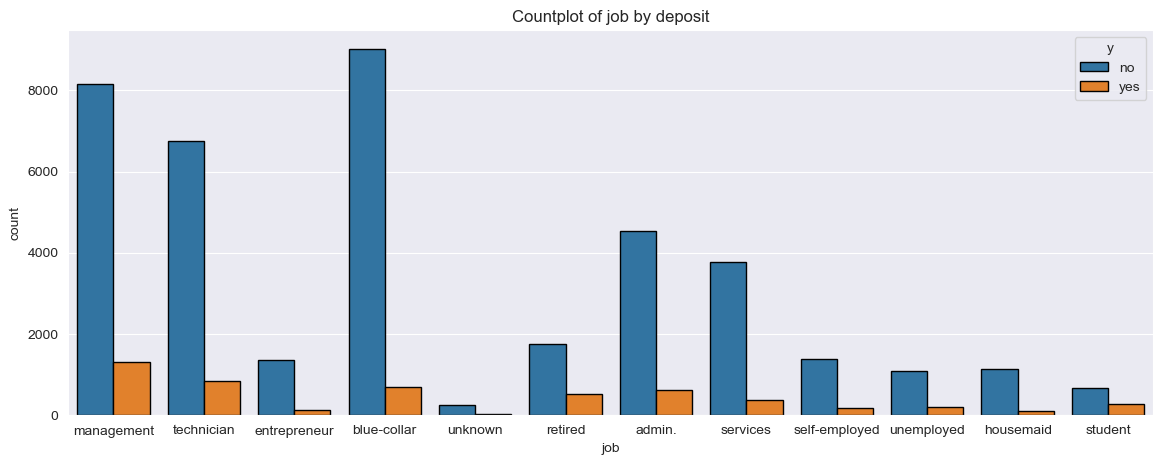

In [297]:

# Analisar o target pelos elementos categoricos por segment plots e histplots
plt.figure(figsize=(13,15))
for i,dados_cate in enumerate(dados_cat):
    plt.subplot(4,2,i+1)
    sea.countplot(x=dados_cate,hue='y',data=dados,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(dados_cate))
plt.tight_layout()
plt.show()
plt.figure(figsize=[14,5])
sea.countplot(x='job', hue='y',edgecolor="black",data=dados)
plt.title("Countplot of job by deposit")
plt.show()

In [298]:
#Analisar dados Numericos
dados.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


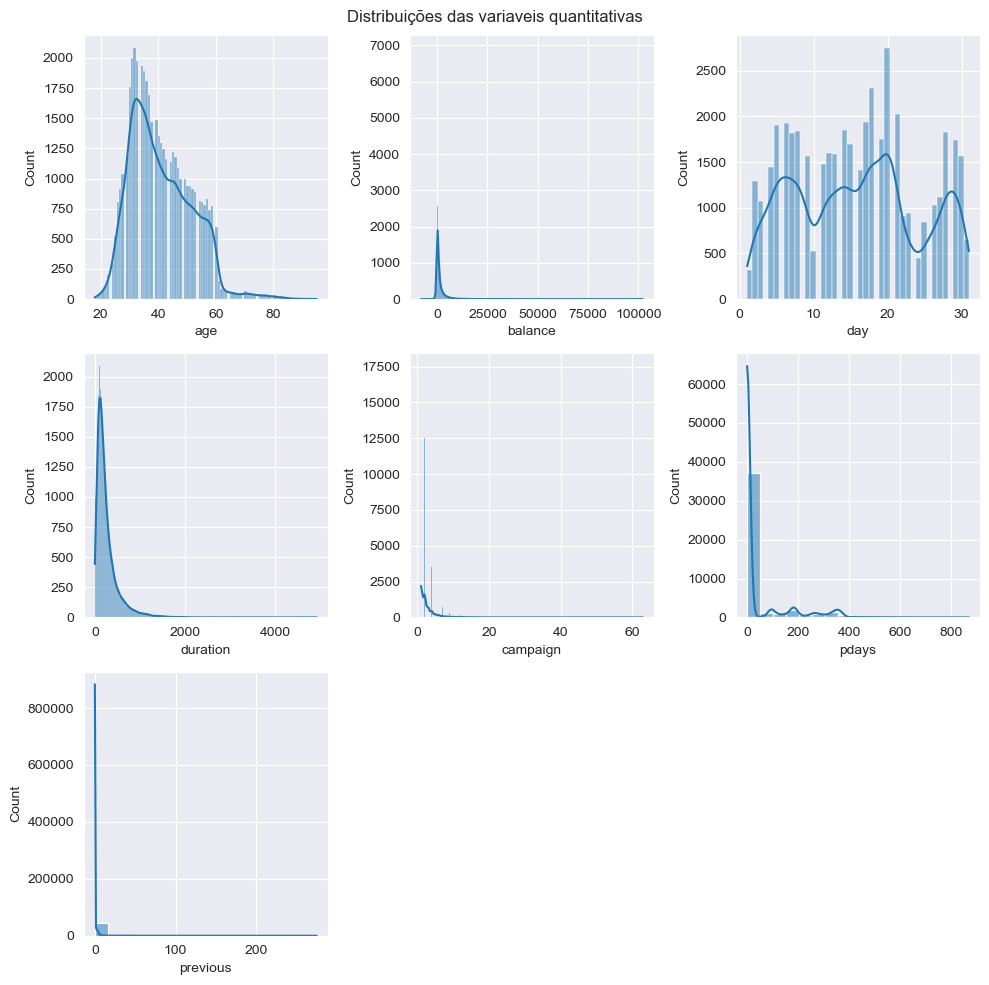

In [299]:
# Distribuicoes dos dados quatitativos
plt.figure(figsize=(10,10))

for i, col in enumerate(dados.select_dtypes(include=['int64']).columns):
    ax = plt.subplot(3,3, i+1)
    sea.histplot(x = dados[col], ax=ax, kde = True)

plt.suptitle('Distribuições das variaveis quantitativas')
plt.tight_layout()

Text(0.5, 1.0, 'Distribuição do numero médio de contactos antes desta campanha para um cliente')

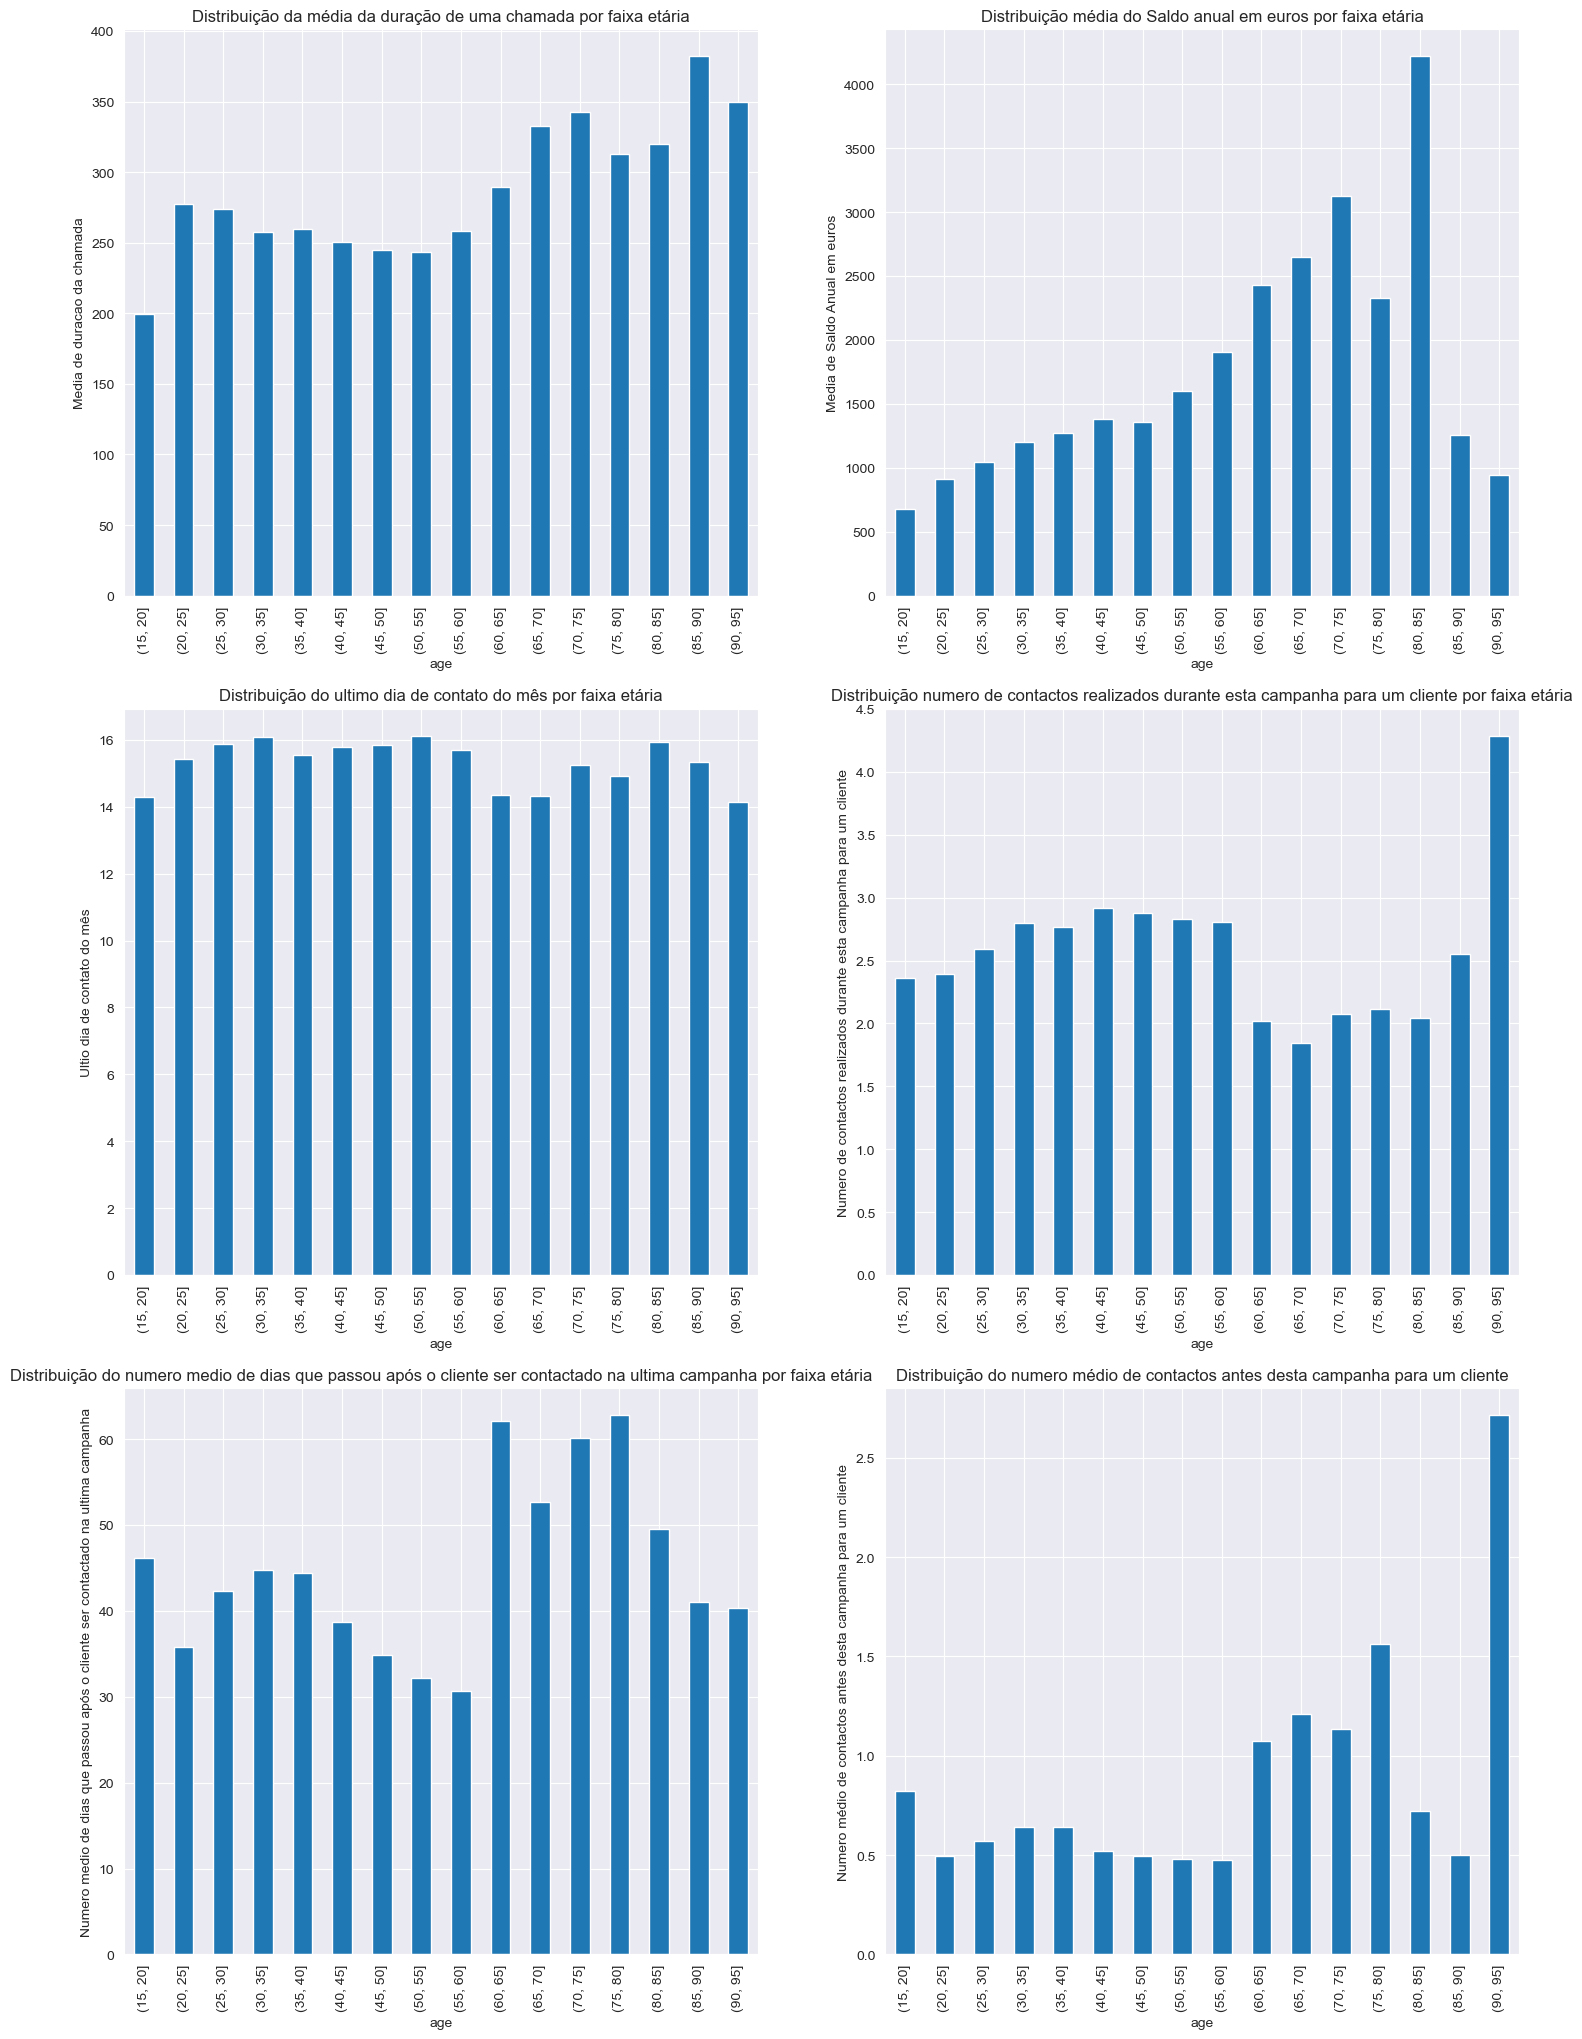

In [300]:
#Vizualização das variaveis numericas por faixa etária
#Vamos fazer distribuições de 5 em 5 anos
plt.figure(figsize=(18,25))
plt.subplot(3,2,1)
faixaidades=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
duracao_chamada_idades = dados.groupby(pd.cut(dados.age,faixaidades)).duration.mean().plot.bar()
plt.ylabel('Media de duracao da chamada')
plt.title('Distribuição da média da duração de uma chamada por faixa etária')
plt.subplot(3,2,2)
avg_balance_idades = dados.groupby(pd.cut(dados.age,faixaidades)).balance.mean().plot.bar()
plt.ylabel('Media de Saldo Anual em euros')
plt.title('Distribuição média do Saldo anual em euros por faixa etária')
plt.subplot(3,2,3)
##Ver melhor!!
last_day_month_contact_idades = dados.groupby(pd.cut(dados.age,faixaidades)).day.mean().plot.bar()
plt.ylabel('Ultio dia de contato do mês')
plt.title('Distribuição do ultimo dia de contato do mês por faixa etária')
plt.subplot(3,2,4)
campaign_contact_per_client_idades = dados.groupby(pd.cut(dados.age,faixaidades)).campaign.mean().plot.bar()
plt.ylabel('Numero de contactos realizados durante esta campanha para um cliente')
plt.title('Distribuição numero de contactos realizados durante esta campanha para um cliente por faixa etária')
plt.subplot(3,2,5)
campaign_contact_per_client_afterlastcampaign_idades = dados.groupby(pd.cut(dados.age,faixaidades)).pdays.mean().plot.bar()
plt.ylabel('Numero medio de dias que passou após o cliente ser contactado na ultima campanha')
plt.title('Distribuição do numero medio de dias que passou após o cliente ser contactado na ultima campanha por faixa etária')
plt.subplot(3,2,6)
number_contacts_beforethiscampaign_idades = dados.groupby(pd.cut(dados.age,faixaidades)).previous.mean().plot.bar()
plt.ylabel('Numero médio de contactos antes desta campanha para um cliente')
plt.title('Distribuição do numero médio de contactos antes desta campanha para um cliente')

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


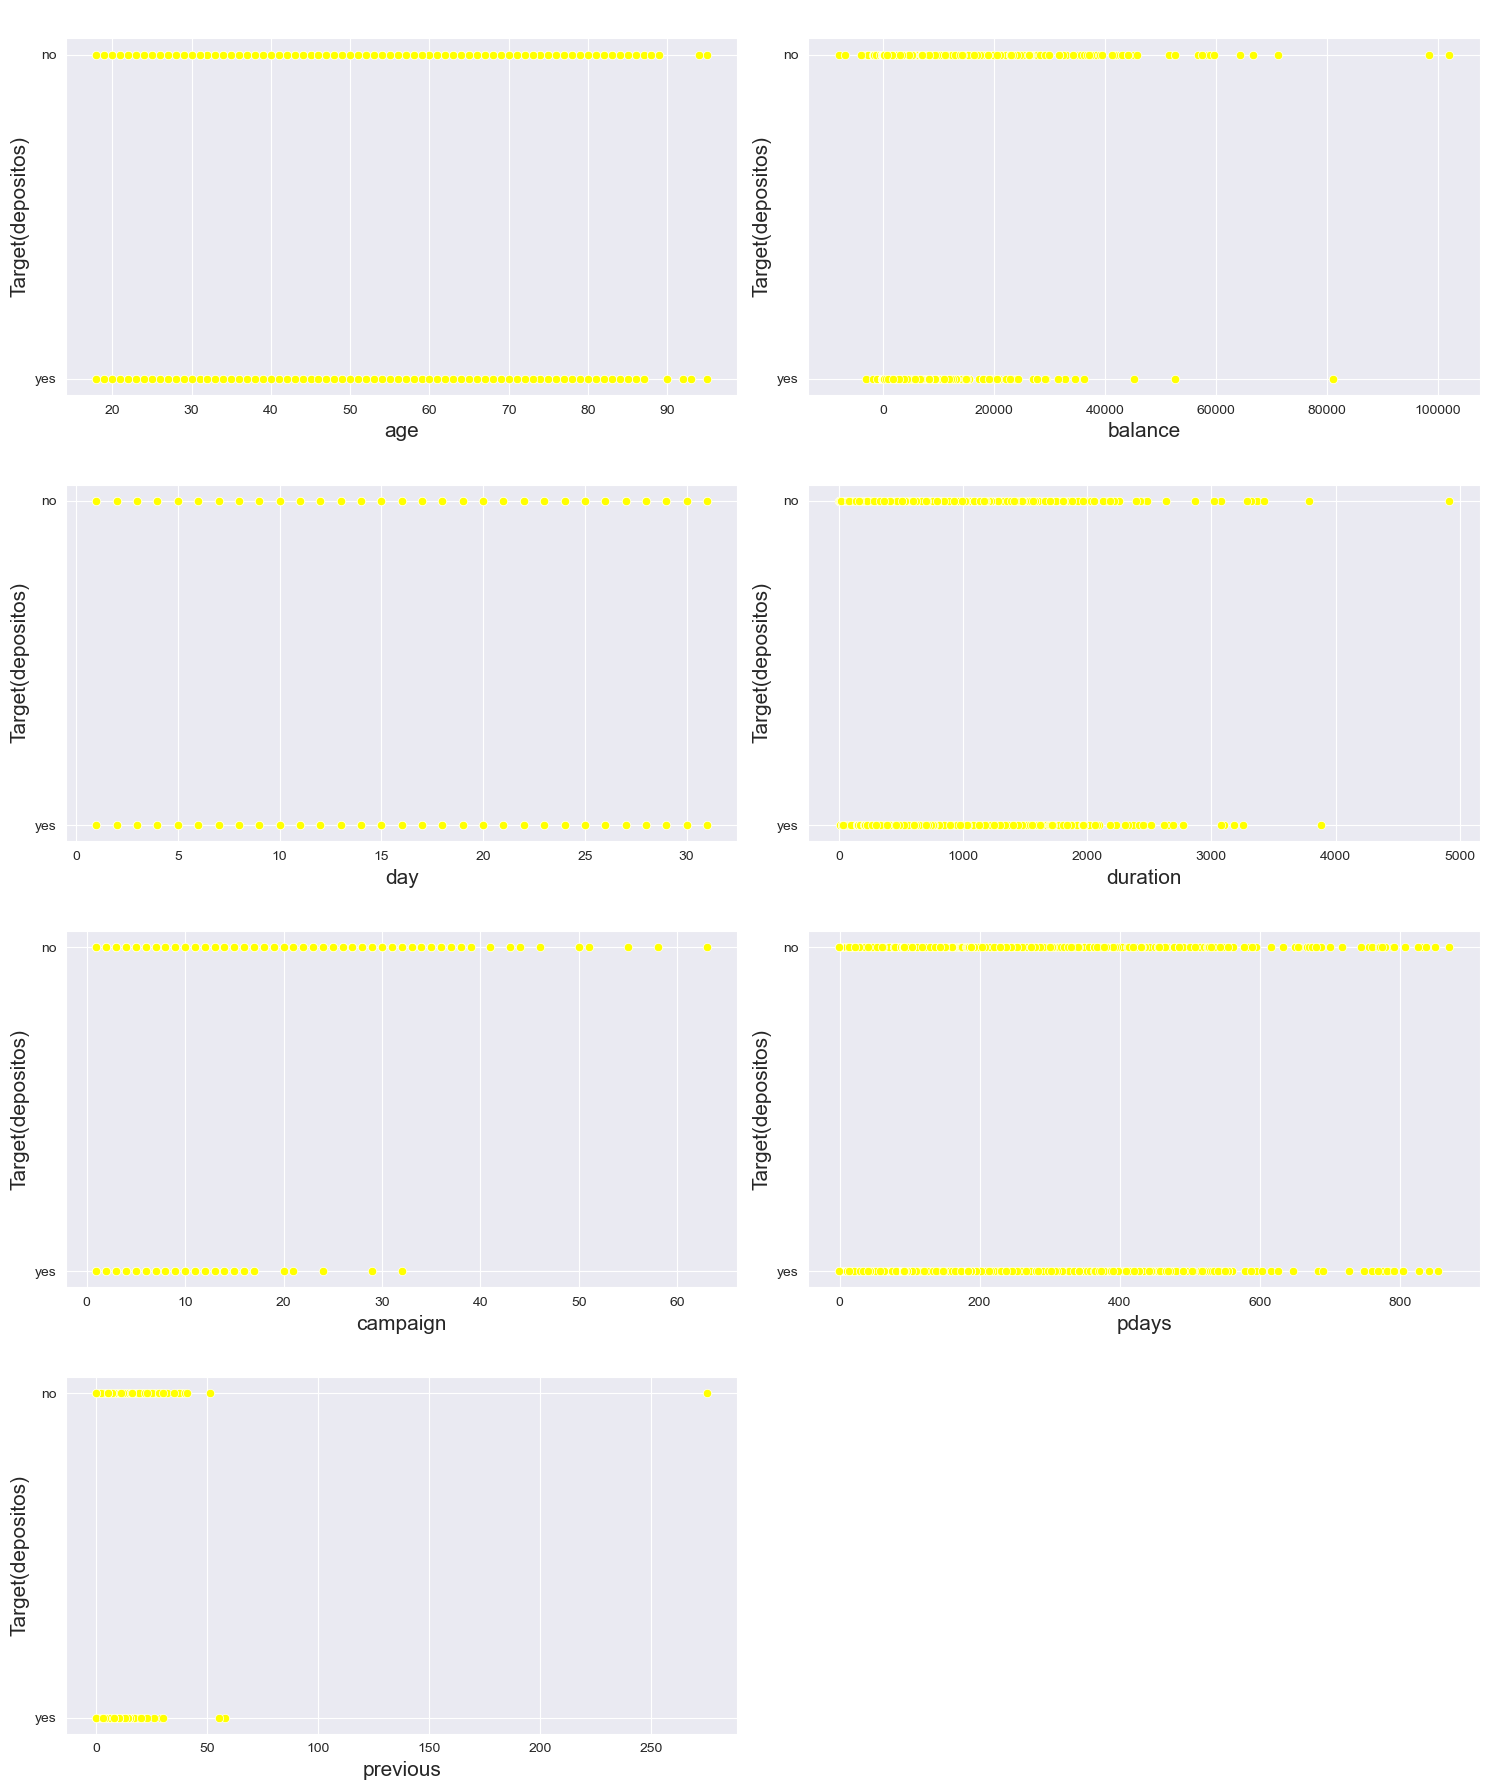

In [301]:
# SCATTER PLOTS PARA OS DADOS NUMERICOS EM FUNCAO DO TARGET

dados_num = dados[['age','balance','day','duration','campaign','pdays','previous','y']]
cols = ['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(15,18))
for i, dados_numericos in enumerate(cols):
    print(i,dados_numericos)
    plt.subplot(4,2,i+1)
    sea.scatterplot(x=dados_numericos, y='y', data=dados_num, color='yellow')
    plt.title("scatterplot of {} by target(depositos)".format(dados_numericos), size=20, color="white")
    plt.xlabel("{}".format(dados_numericos),size=15)
    plt.ylabel("Target(depositos)",size=15)
plt.tight_layout()

In [302]:
dados.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


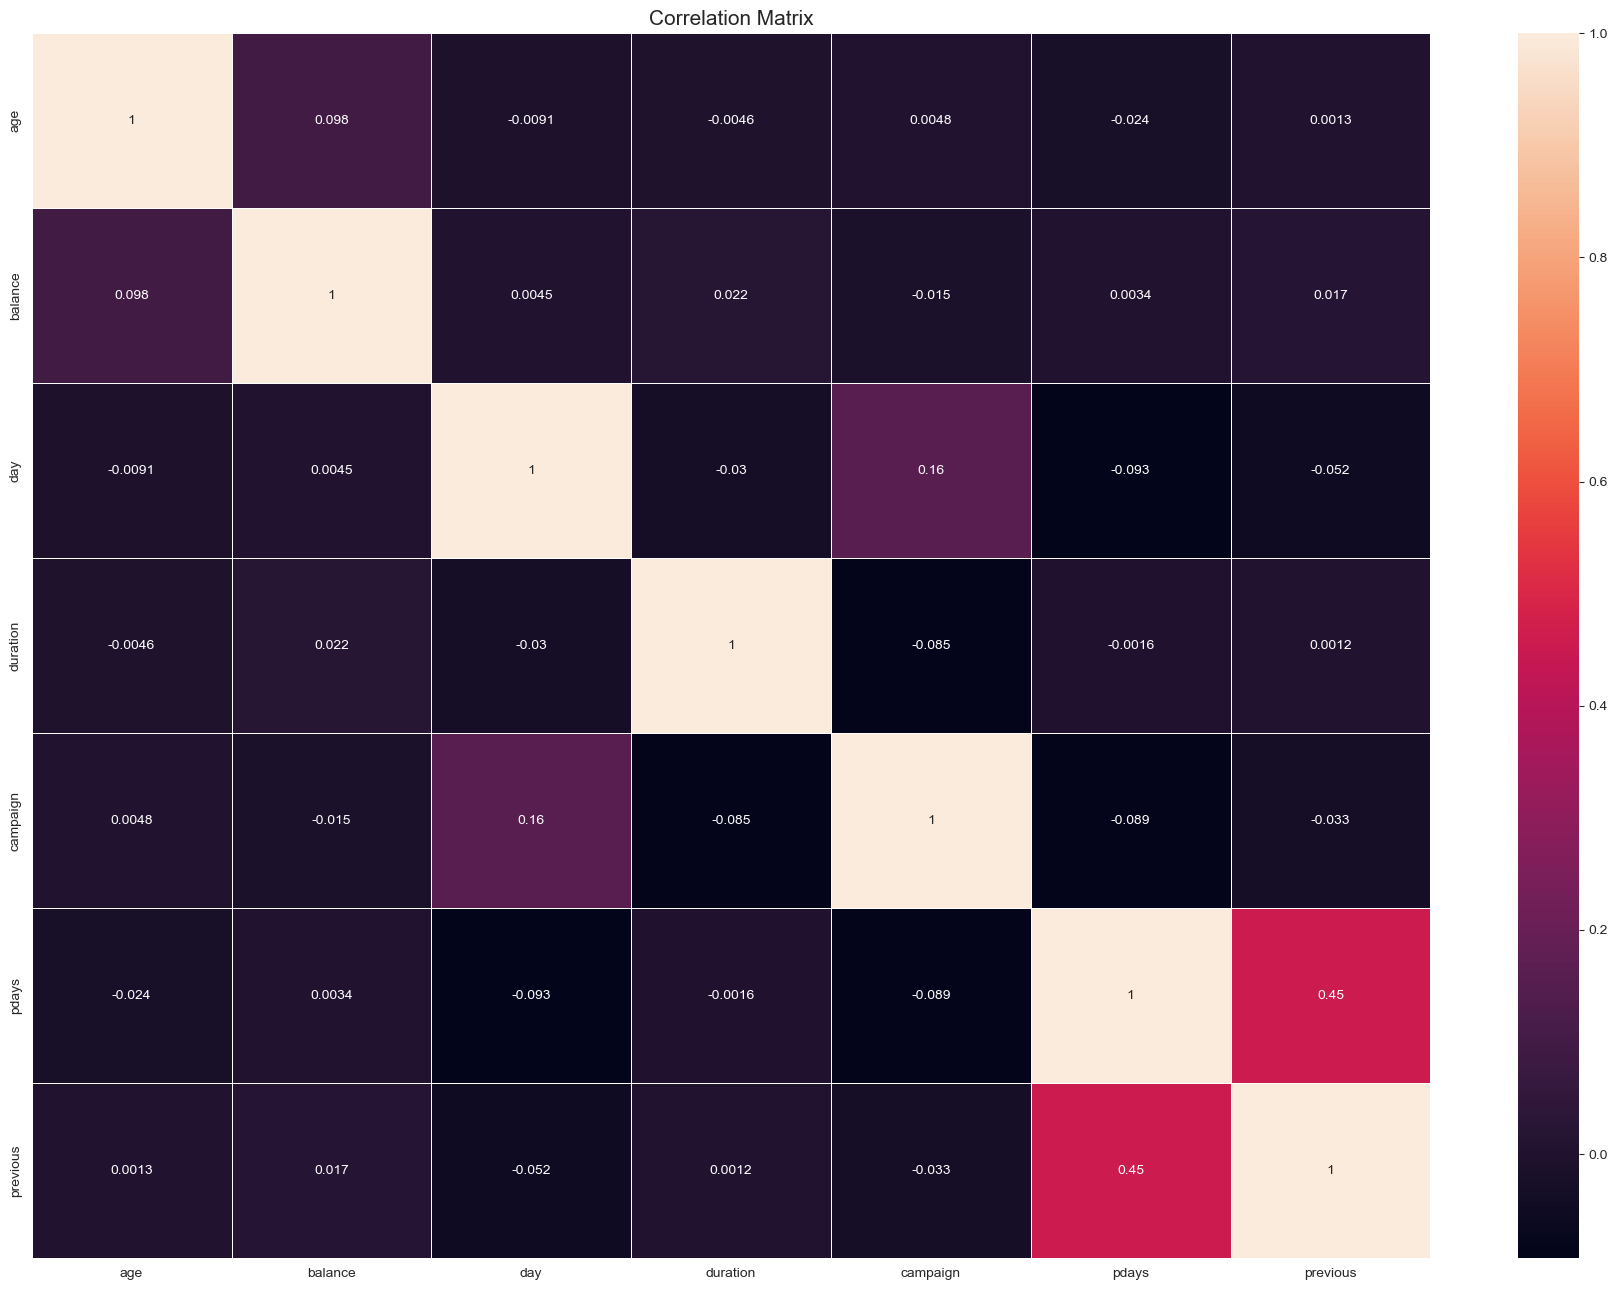

In [303]:
##Matrix de Correlação
plt.subplots(figsize = (18,13))
hmap = sea.heatmap(data = dados.corr(), annot=True , linewidths=0.5)
plt.title("Correlation Matrix", fontsize=15)
plt.tight_layout()

# ----------------------------------- DETETAR OUTLIERS -----------------------------

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


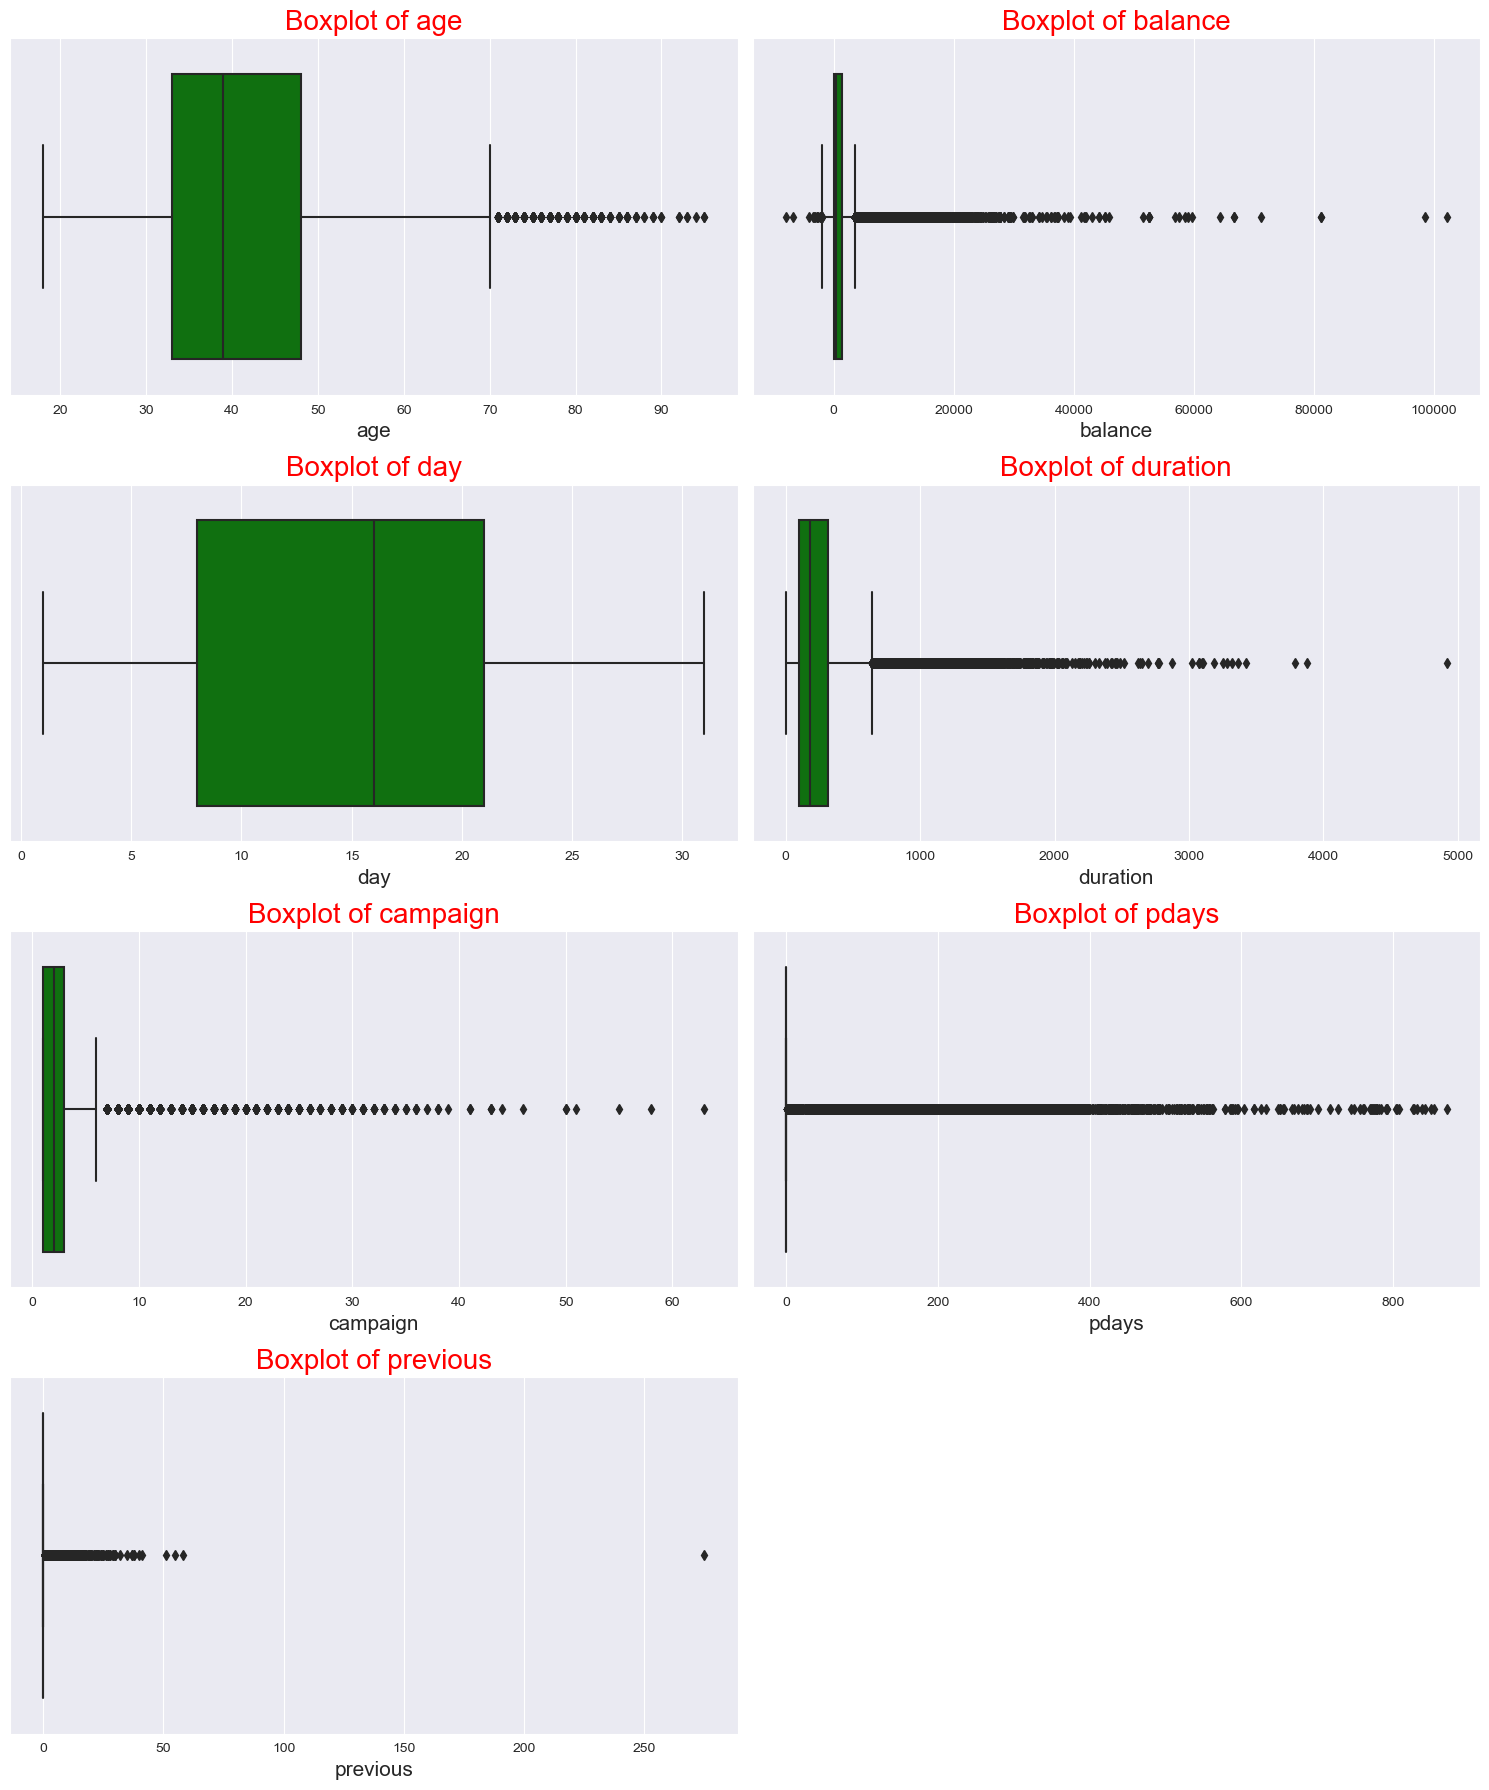

In [304]:
# BOX PLOT PARA OS DADOS NUMERICOS
plt.figure(figsize=(15,18))
for i,dados_numericos in enumerate(cols):
    print(i,dados_numericos)
    plt.subplot(4,2,i+1)
    sea.boxplot(x=dados_numericos,data=dados_num,color='green')
    plt.title("Boxplot of {}".format(dados_numericos),size=20,color="red")
    plt.xlabel("{}".format(dados_numericos),size=15)
plt.tight_layout()

# ------------------------------- TRATAR DOS OUTLIERS -----------------------

In [305]:
# BALANCE
# VAMOS DAR DROP A TODAS AS LINHAS COM BALANCE NEGATIVO E VAMOS TAMBEM DAR DROP A LINHAS COM BALANCE MUITO ALTOS

# DAR DROP DAS LINHAS
dados.drop(dados[(dados['balance']>40000)|(dados['balance']<0)].index,inplace=True,axis=0)

In [306]:
# DURATION
# VAMOS DAR DROP A TODAS AS LINHAS EM QUE A DURACAO DESDE O ULTIMO CONTACTO FOI ACIMA DE 2500 DIAS
dados.drop(dados[dados['duration']>2500].index,inplace=True,axis=0)


In [307]:
# CAMPAIGN
# VAMOS DAR DROP A TODAS AS LINHAS EM QUE O NUMERO DE CONTACTOS FOI ACIMA DE 40
dados.drop(dados[dados['campaign']>40].index,axis=0,inplace=True)

In [308]:
# PDAYS
# VAMOS DAR DROP A TODA A INFORMACAO dos pdays
dados.drop("pdays",inplace=True,axis=1)

In [309]:
# PREVIOUS
dados.drop(dados[dados['previous']>30].index,axis=0,inplace=True)

# --------------------------------- ENCODING CATEGORICAL VALUES ----------------------------

#TIPOS DE Encodinm

#Bianry Encoding PARA OS VALORES binarios 0 e 1


#Ordinal Encoding para atributos ordinais que dao para enumerar

#OneHot Encoding para

#Dummy Encoding igual ao oneHot encoding mas N-1 gerando novas features


In [310]:
#Binary Encoding
from sklearn.preprocessing import LabelBinarizer

lista_bin = ["default","housing","loan", "y"]

for i in lista_bin:
    dados[i] = LabelBinarizer().fit_transform(dados[i].values)


In [311]:
#Ordinal Encoding
from sklearn.preprocessing import LabelEncoder

lista_ordinal=["month","contact","poutcome"]
for i in lista_ordinal:
    dados[i]=LabelEncoder().fit_transform(dados[i].values)

In [312]:
# Dummy Encoding
dados = pd.get_dummies(dados, columns= ['job','marital','education'])

In [317]:
# Reset Index e ver dados de novo
dados = dados.reset_index()
dados.drop('index', axis=1, inplace=True)
dados

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,2,5,8,261,1,...,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,2,5,8,151,1,...,1,0,0,0,0,1,0,1,0,0
2,33,0,2,1,1,2,5,8,76,1,...,0,0,0,0,1,0,0,1,0,0
3,47,0,1506,1,0,2,5,8,92,1,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,2,5,8,198,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41367,51,0,825,0,0,0,17,9,977,3,...,1,0,0,0,1,0,0,0,1,0
41368,71,0,1729,0,0,0,17,9,456,2,...,0,0,0,1,0,0,1,0,0,0
41369,72,0,5715,0,0,0,17,9,1127,5,...,0,0,0,0,1,0,0,1,0,0
41370,57,0,668,0,0,1,17,9,508,4,...,0,0,0,0,1,0,0,1,0,0


In [319]:
#Separar as Fetures do target
X = dados.drop('y',axis=1)
Y = dados['y']

In [321]:
from sklearn.model_selection import StratifiedShuffleSplit
Split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=1)
for train_i, test_i in Split.split(X,Y):
    train_dados = dados.loc[train_i]
    test_dados = dados.loc[test_i]

In [352]:
X_train = train_dados.drop("y",axis=1)
Y_train = train_dados['y']

X_test = test_dados.drop("y",axis=1)
Y_test = test_dados['y']

In [332]:
#Scaling
from sklearn.preprocessing import StandardScaler

obj= StandardScaler()

X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)